In [49]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [50]:
# Constants
agent_name = "swq14"
model_name = "debug"

In [51]:
trained_model = np.load(f"model_{agent_name}_{model_name}.pt", allow_pickle = True)
policy        = np.argmax(trained_model, axis = 1)

In [52]:
all_features = np.array(
    [
        [0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 1],
        [0, 1, 1, 1],
        [1, 1, 1, 1],
        [0, 0, 0, 2],
        [0, 0, 1, 2],
        [0, 1, 1, 2],
        [1, 1, 1, 2],
        [0, 0, 2, 2],
        [0, 1, 2, 2],
        [1, 1, 2, 2],
        [0, 2, 2, 2],
        [1, 2, 2, 2],
        [2, 2, 2, 2],   
    ]
)

### Evaluating the trained model

In [53]:
print("State  Features   Policy  Trained model")
for i in range(len(policy)):
    line = f"{i:2}{'':5}{all_features[i]}{'':2}{policy[i]}{'':7}["
    for Q_value in trained_model[i]:
        line += f"{Q_value:-7.3f}"
    line += "]"
    print(line)

State  Features   Policy  Trained model
 0     [0 0 0 0]  0       [  0.000  0.000  0.000  0.000]
 1     [0 0 0 1]  0       [  0.000  0.000  0.000  0.000]
 2     [0 0 1 1]  0       [  0.560  0.026  0.000  0.000]
 3     [0 1 1 1]  0       [  0.000  0.000  0.000  0.000]
 4     [1 1 1 1]  0       [  0.000  0.000  0.000  0.000]
 5     [0 0 0 2]  0       [  0.000  0.000  0.000  0.000]
 6     [0 0 1 2]  3       [ -0.324 -0.364  0.000  0.931]
 7     [0 1 1 2]  3       [ -0.258  0.000  0.000  1.374]
 8     [1 1 1 2]  3       [  0.000  0.000  0.000  1.646]
 9     [0 0 2 2]  3       [ -0.205 -0.195  0.086  0.313]
10     [0 1 2 2]  3       [ -0.096  0.000  0.150  1.047]
11     [1 1 2 2]  3       [  0.000  0.000  0.218  1.337]
12     [0 2 2 2]  2       [ -0.017  0.000  0.019  0.000]
13     [1 2 2 2]  3       [  0.000  0.036  0.029  0.758]
14     [2 2 2 2]  0       [  0.000  0.000  0.000  0.000]


### Looking at the training process

In [54]:
def moving_average(x, w):
    """
    from https://newbedev.com/how-to-calculate-rolling-moving-average-using-numpy-scipy
    """
    return np.convolve(x, np.ones(w), 'valid') / w

In [55]:
def analyze_state (state):
    Q_state = allQs[:, state]
    labels  = ["action 0", "action 1", "action 2", "action 3"]

    plt.plot(rounds, Q_state, label = labels)
    plt.title(f"Evolution of state {state}")
    plt.ylabel("Q-value")
    plt.xlabel("training round")
    plt.legend()
    plt.show()

### Training performance over rounds

In [56]:
with open("results_train.json") as file:
    training_results = json.load(file)

In [57]:
number_of_rounds = training_results['by_agent'][f"agent_{agent_name}"]['rounds']
rounds           = np.arange(number_of_rounds) + 1

round_list      = list(training_results['by_round'])
collected_coins = np.zeros(number_of_rounds)
round_lengths   = np.zeros(number_of_rounds)
for i, round_name in enumerate(round_list):
    round              = training_results['by_round'][round_name]
    collected_coins[i] = round['coins']
    round_lengths[i]   = round['steps']

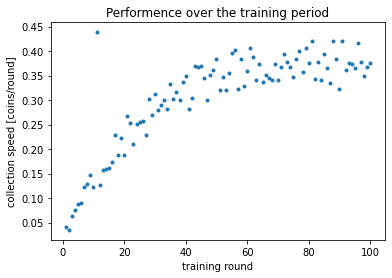

In [58]:
plt.plot(rounds, collected_coins / round_lengths, '.')
plt.title("Performence over the training period")
plt.ylabel("collection speed [coins/round]")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")
plt.show()

### Evolution of the Q-model

In [59]:
allQs = np.load("Qtrain.npy")

for i in range(len(policy)):
    analyze_state(i)

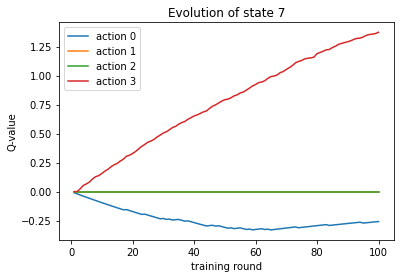

In [60]:
analyze_state(7)

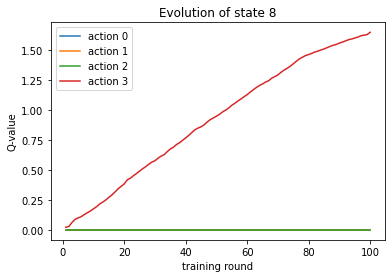

In [61]:
analyze_state(8)

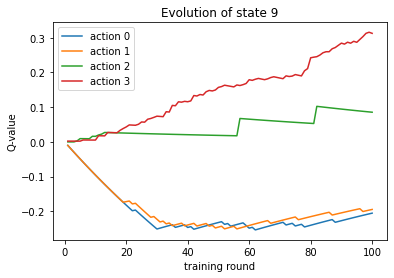

In [62]:
analyze_state(9)

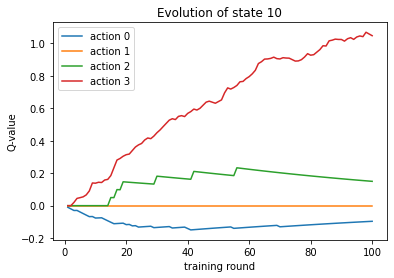

In [63]:
analyze_state(10)

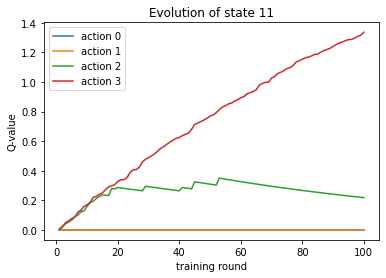

In [64]:
analyze_state(11)